<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/TCC_1_DESCOBRINDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO AS BIBLIOTECAS E LENDO O ARQUIVO EM EXCEL.**


---

O NOME DO ARQUIVO VAI TER O NOME DE 'db', DE DATABASE.

In [ ]:
# IMPORTANDO BIBLIOTECA PARA DADOS.
import pandas as pd

# IMPORTANDO BIBLIOTECA PARA GRÁFICOS.
import matplotlib.pyplot as plt

# IMPOTANDO BIBLIOTECA PARA TRABALHAR COM NÚMEROS.
import numpy as np

# LENDO O ARQUIVO NO DRIVE.
db = pd.read_excel('/content/drive/MyDrive/TCC/db_dados/Dados_I_V_2023.xlsx')

# APRESENTANDO VISUALMENTE A TABELA.
display(db)

,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%]
0,2023-02-02 09:45:30.000,0.2,0.0,0.0,0.0,30.0
1,2023-02-02 09:45:45.000,0.2,0.0,0.0,0.0,30.0
2,2023-02-02 09:46:00.000,0.2,0.0,0.0,0.0,30.0
3,2023-02-02 09:46:15.000,0.2,0.0,0.0,0.0,30.0
4,2023-02-02 09:46:30.000,0.2,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...
58744,2023-12-29 11:23:47.834,0.0,0.0,0.0,0.0,0.0
58745,2023-12-29 11:24:02.834,0.0,0.0,0.0,0.0,0.0
58746,2023-12-29 11:24:17.834,0.0,0.0,0.0,0.0,0.0
58747,2023-12-29 11:24:32.834,0.0,0.0,0.0,0.0,0.0


# **MOSTRANDO OS TIPOS DE DADOS DO 'db'.**

---



In [ ]:
# TRAZENDO OS TIPOS DE DADOS DA TABELA.
tipos_dados = db.dtypes

# MOSTRANDO/APRESENTANDO OS RESULTADOS.
print(tipos_dados)

HORA              datetime64[ns]
Corrente_A_[A]           float64
Corrente_B_[A]           float64
Tensao_A_[V]             float64
Tensao_B_[V]             float64
PowerSet_[%]             float64
dtype: object


# **FILTRANDO A TABELA PARA APENAS 1 DIA EM ESPECÍFICO. O DB DO DIA SERÁ CHAMADO 'db_dia'.**

---

In [ ]:
# FILTRANDO A TABELA EM UM DIA ESPECÍFICO.
db_dia = db.loc[db['HORA'].dt.date == pd.to_datetime('2023-02-02').date()]

display(db_dia)

,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%]
0,2023-02-02 09:45:30,0.2,0.0,0.0,0.0,30.0
1,2023-02-02 09:45:45,0.2,0.0,0.0,0.0,30.0
2,2023-02-02 09:46:00,0.2,0.0,0.0,0.0,30.0
3,2023-02-02 09:46:15,0.2,0.0,0.0,0.0,30.0
4,2023-02-02 09:46:30,0.2,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.7,0.0,50.0
333,2023-02-02 11:08:45,0.2,1.3,0.7,0.0,30.0
334,2023-02-02 11:09:00,0.2,1.3,0.7,0.0,30.0
335,2023-02-02 11:09:15,0.2,1.3,0.7,0.0,30.0


# **CRIANDO E FORMATANDO O GRÁFICO DE CORRENTES A E B.**

---



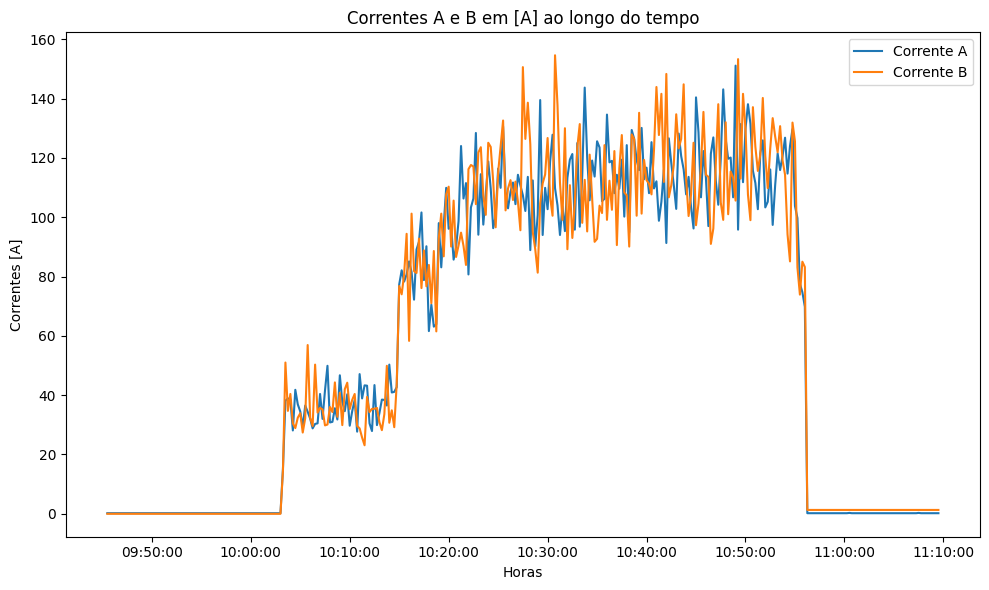

In [ ]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['HORA'], \
            db_dia['Corrente_A_[A]'], \
                label='Corrente A')

plt.plot(db_dia['HORA'], \
            db_dia['Corrente_B_[A]'], \
                label='Corrente B')

# ADICIONANDO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Correntes [A]')

# ADICIONANDO O TÍTULO.
plt.title('Correntes A e B em [A] ao longo do tempo')

# # ADICIONANDO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# INCLINANDO O EIXO X.
# plt.xticks(rotation=45)

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CALCULANDO A POTÊNCIA DE A.**

---



In [ ]:
# CALCULANDO A POTÊNCIA DE A.
# db_dia['Potencia_A_[kW]'] = db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000

# TRAZENDO O ÍNDICE DA COLUNA 'Corrente_B_[A]'.
indice_corrente_B = db_dia.columns.get_loc('Corrente_B_[A]')

# INSERINDO A COLUNA 'Potencia_A_[kW]' DEPOIS DA COLUNA 'Corrente_B_[A]'.
db_dia.insert(indice_corrente_B + 1, \
                'Potencia_A_[kW]', \
                    db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000)

display(db_dia)

,HORA,Corrente_A_[A],Corrente_B_[A],Potencia_A_[kW],Tensao_A_[V],Tensao_B_[V],PowerSet_[%]
0,2023-02-02 09:45:30,0.2,0.0,0.00000,0.0,0.0,30.0
1,2023-02-02 09:45:45,0.2,0.0,0.00000,0.0,0.0,30.0
2,2023-02-02 09:46:00,0.2,0.0,0.00000,0.0,0.0,30.0
3,2023-02-02 09:46:15,0.2,0.0,0.00000,0.0,0.0,30.0
4,2023-02-02 09:46:30,0.2,0.0,0.00000,0.0,0.0,30.0
...,...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.00014,0.7,0.0,50.0
333,2023-02-02 11:08:45,0.2,1.3,0.00014,0.7,0.0,30.0
334,2023-02-02 11:09:00,0.2,1.3,0.00014,0.7,0.0,30.0
335,2023-02-02 11:09:15,0.2,1.3,0.00014,0.7,0.0,30.0


# **CALCULANDO A POTÊNCIA DE B.**

---


In [ ]:
# CALCULANDO A POTÊNCIA DE B.
# db_dia['Potencia_B_[kW]'] = db_dia['Corrente_B_[A]'] * db_dia['Tensao_B_[V]'] / 1000

# TRAZENDO O ÍNDICE DA COLUNA 'Tensao_B_[V]'.
indice_tensao_B = db_dia.columns.get_loc('Tensao_B_[V]')

# INSERINDO A COLUNA 'Potencia_B_[kW]' DEPOIS DA COLUNA 'Tensao_B_[V]'.
db_dia.insert(indice_tensao_B + 1, \
                'Potencia_B_[kW]', \
                    db_dia['Corrente_B_[A]'] * db_dia['Tensao_B_[V]'] / 1000)

display(db_dia)

,HORA,Corrente_A_[A],Corrente_B_[A],Potencia_A_[kW],Tensao_A_[V],Tensao_B_[V],Potencia_B_[kW],PowerSet_[%]
0,2023-02-02 09:45:30,0.2,0.0,0.00000,0.0,0.0,0.0,30.0
1,2023-02-02 09:45:45,0.2,0.0,0.00000,0.0,0.0,0.0,30.0
2,2023-02-02 09:46:00,0.2,0.0,0.00000,0.0,0.0,0.0,30.0
3,2023-02-02 09:46:15,0.2,0.0,0.00000,0.0,0.0,0.0,30.0
4,2023-02-02 09:46:30,0.2,0.0,0.00000,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.00014,0.7,0.0,0.0,50.0
333,2023-02-02 11:08:45,0.2,1.3,0.00014,0.7,0.0,0.0,30.0
334,2023-02-02 11:09:00,0.2,1.3,0.00014,0.7,0.0,0.0,30.0
335,2023-02-02 11:09:15,0.2,1.3,0.00014,0.7,0.0,0.0,30.0


# **GERANDO O GRÁFICO DE POTÊNCIA DE A AO LONGO DO TEMPO E CALCULANDO SUA ENERGIA.**

---



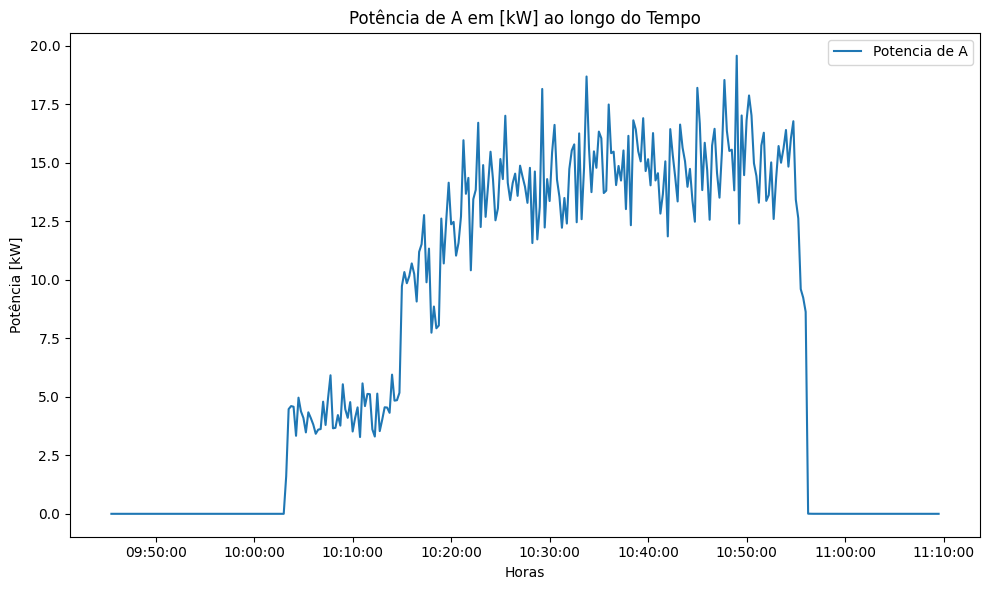

In [ ]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['HORA'], \
            db_dia['Potencia_A_[kW]'], \
                label='Potencia de A')

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potência [kW]')

# ADICIONADNO O TÍTULO.
plt.title('Potência de A em [kW] ao longo do Tempo')

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# ADICIONADNO A LEGENDA.
plt.legend()

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **PREENCHENDO A ÁREA SOB O GRÁFICO.**

---



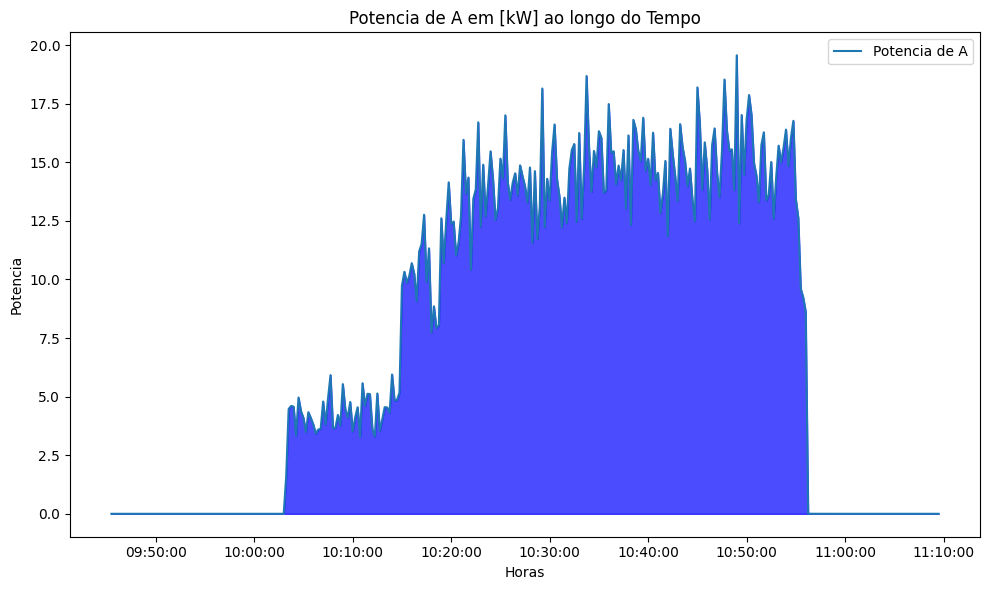

In [ ]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['HORA'], \
            db_dia['Potencia_A_[kW]'], \
                label='Potencia de A')

# PREENCHENDO A ÁREA SOB O GRÁFICO.
plt.fill_between(db_dia['HORA'], \
                    db_dia['Potencia_A_[kW]'], \
                        color='blue', \
                            alpha=0.7)

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potencia')

# ADICIONADNO O TÍTULO.
plt.title('Potencia de A em [kW] ao longo do Tempo')

# # ADICIONADNO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

In [ ]:
# CALCULANDO A INTEGRAL PELO MÉTODO DO TRAPÉZIO.
integral_PotenciaA = np.trapz(db_dia['Potencia_A_[kW]'], \
                                db_dia['HORA'])

# IMPRIMINDO O RESULTADO.
print("Energia de A:", integral_PotenciaA)

Energia de A: 37744093799943 nanoseconds


# **GERANDO O GRÁFICO DE POTÊNCIA DE B AO LONGO DO TEMPO E CALCULANDO SUA ENERGIA.**

---



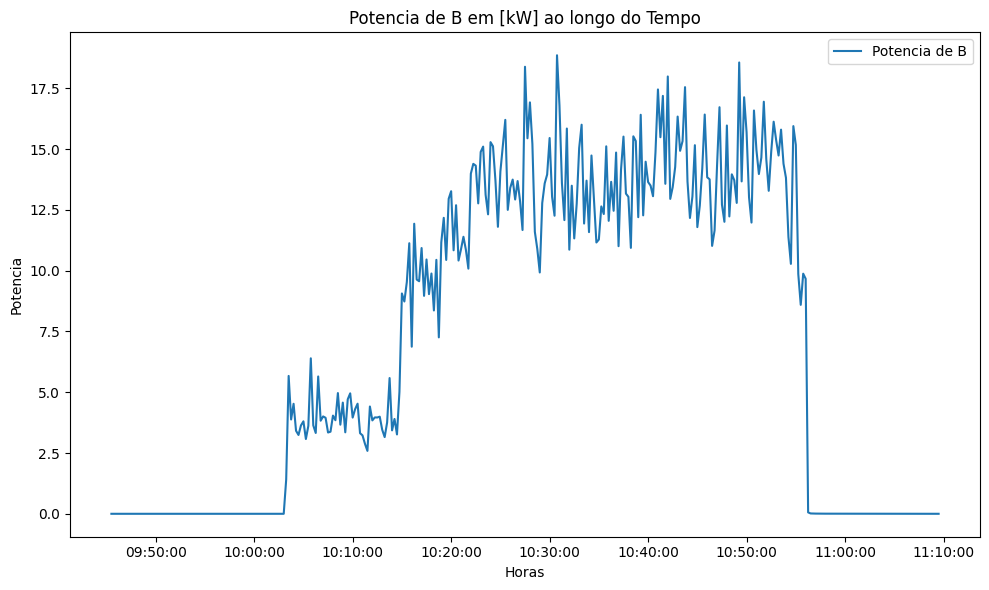

In [ ]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['HORA'], \
            db_dia['Potencia_B_[kW]'], \
                label='Potencia de B')

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potencia')

# ADICIONADNO O TÍTULO.
plt.title('Potencia de B em [kW] ao longo do Tempo')

# ADICIONADNO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **PREENCHENDO A ÁREA SOB O GRÁFICO.**

---

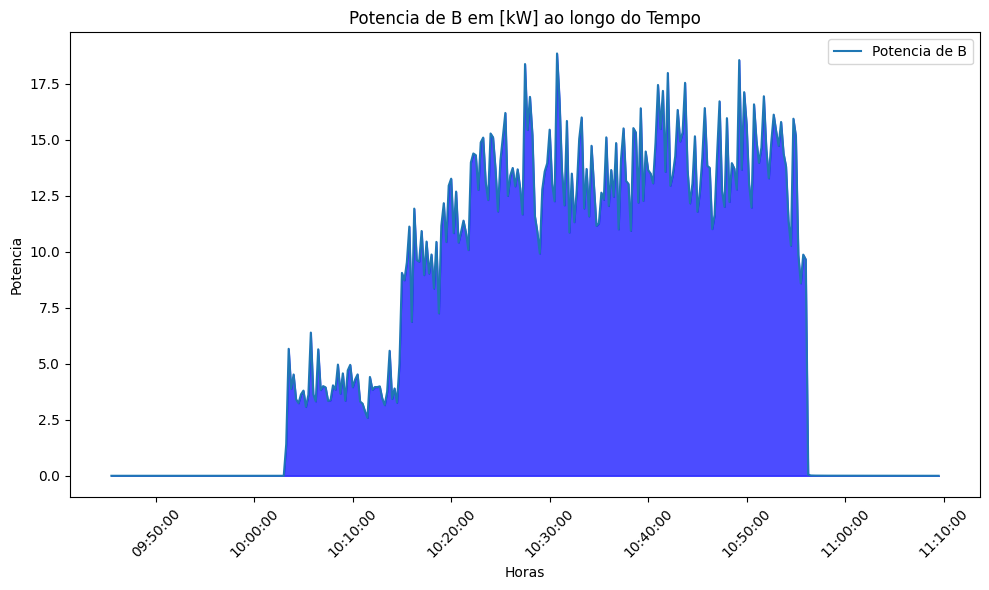

In [ ]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['HORA'], \
            db_dia['Potencia_B_[kW]'], \
                label='Potencia de B')

# PREENCHENDO A ÁREA SOB O GRÁFICO.
plt.fill_between(db_dia['HORA'], \
                    db_dia['Potencia_B_[kW]'], \
                        color='blue', \
                            alpha=0.7)

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potencia')

plt.title('Potencia de B em [kW] ao longo do Tempo')

# ADICIONADNO A LEGENDA.
plt.legend()

# INCLINADNO O EIXO X.
plt.xticks(rotation=45)

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

In [ ]:
# CALCULANDO A INTEGRAL PELO MÉTODO DO TRAPÉZIO.
integral_PotenciaA = np.trapz(db_dia['Potencia_B_[kW]'], \
                                db_dia['HORA'])

# IMPRIMINDO O RESULTADO.
print("Energia de B:", integral_PotenciaA )

Energia de B: 35605759049952 nanoseconds


# **TESTES EM GRÁFICOS.**

---



# **GERANDO GRÁFICO DE CORRENTES A E B COM POWERSET AO LONGO DO TEMPO.**

---


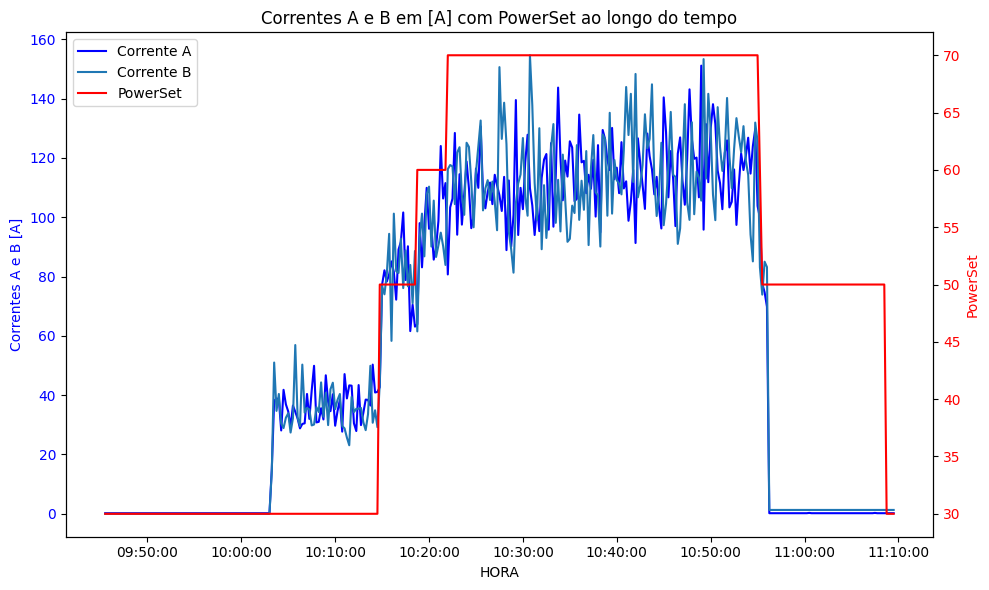

In [ ]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(10, 6))

# PLOTANDO OS DADOS PARA O PRIMEIRO EIXO Y (À ESQUERDA).
ax1.plot(db_dia['HORA'], \
            db_dia['Corrente_A_[A]'], a
                label='Corrente A', \
                    color='blue')

plt.plot(db_dia['HORA'], db_dia['Corrente_B_[A]'], \
            label='Corrente B')

ax1.set_xlabel('HORA')

ax1.set_ylabel('Correntes A e B [A]', \
                    color='blue')

ax1.tick_params(axis='y', \
                    labelcolor='blue')

# PLOTANDO OS DADOS PARA O SEGUNDO EIXO Y (À DIREITA).
ax2 = ax1.twinx()

ax2.plot(db_dia['HORA'], \
            db_dia['PowerSet_[%]'], \
                label='PowerSet', \
                    color='red')

ax2.set_ylabel('PowerSet', \
                    color='red')

ax2.tick_params(axis='y', \
                    labelcolor='red')

# ADICIONADNO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# ADICIONADNO O TÍTULO.
plt.title('Correntes A e B em [A] com PowerSet ao longo do tempo')

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **GERANDO GRÁFICO DE PARÂMETROS DE ENERGIA COM POWERSET AO LONGO DO TEMPO.**

---



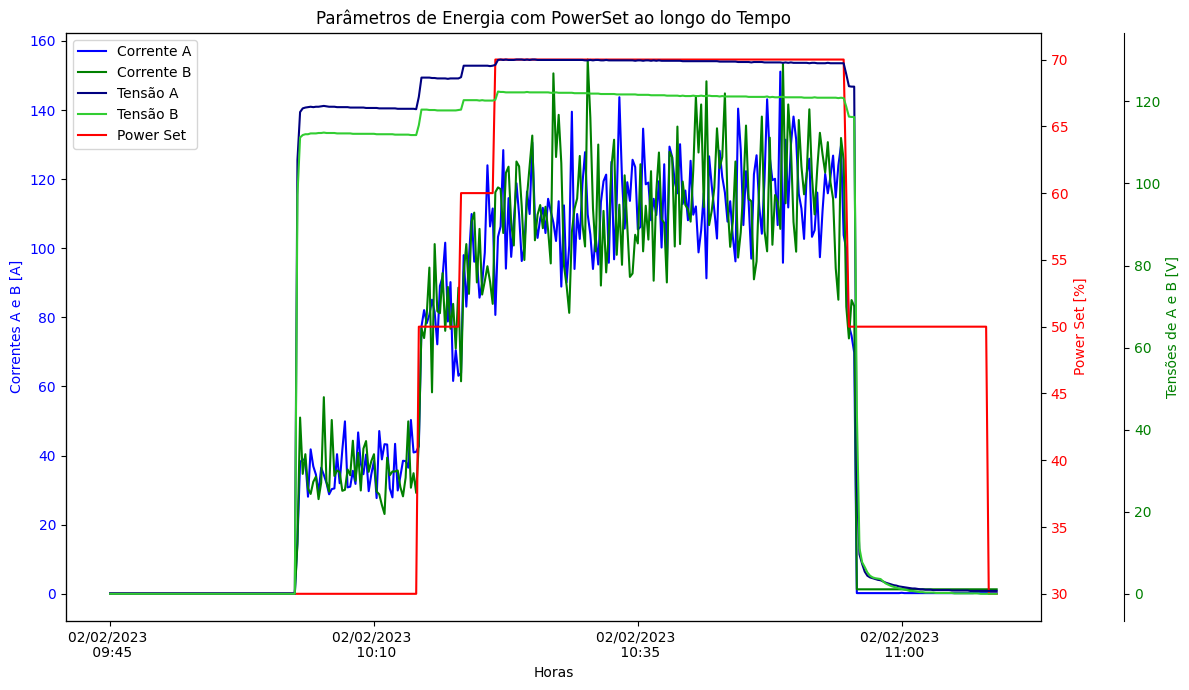

In [ ]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(12, 7))

# PLOTANDO OS DADOS E CRIANDO O EIXO Y ESQUERDO.
ax1.plot(db_dia['HORA'], \
            db_dia['Corrente_A_[A]'], \
                label='Corrente A', \
                    color='blue')

ax1.plot(db_dia['HORA'], \
            db_dia['Corrente_B_[A]'], \
                label='Corrente B', \
                    color='green')

ax1.set_xlabel('Horas')

ax1.set_ylabel('Correntes A e B [A]', color='blue')

ax1.tick_params(axis='y', labelcolor='blue')

# PLOTANDO OS DADOS E CRIANDO O 1º EIXO Y DO LADO DIREITO.
ax1_2 = ax1.twinx()

ax1_2.plot(db_dia['HORA'], \
            db_dia['PowerSet_[%]'], \
                label='Power Set', \
                    color='red')

ax1_2.set_ylabel('Power Set [%]', \
                    color='red')

ax1_2.tick_params(axis='y', \
                    labelcolor='red')

# PLOTANDO OS DADOS E CRIANDO O 2º EIXO Y DO LADO DIREITO.
ax1_3 = ax1.twinx()

ax1_3.spines['right'].set_position(('outward', 60))

ax1_3.plot(db_dia['HORA'], \
            db_dia['Tensao_A_[V]'], \
                label='Tensão A', \
                    color='navy')

ax1_3.plot(db_dia['HORA'], \
            db_dia['Tensao_B_[V]'], \
                label='Tensão B', \
                    color='limegreen')

ax1_3.set_ylabel('Tensões de A e B [V]', \
                    color='green')

ax1_3.tick_params(axis='y', \
                    labelcolor='green')

# ADICIONADNDO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax1_2.get_legend_handles_labels()

lines3, labels3 = ax1_3.get_legend_handles_labels()

ax1.legend(lines + lines3 + lines2, \
                labels + labels3 + labels2, \
                            loc='upper left')   # MUDANDO A ORDEM QUE APARECE OS PARÂMETROS NA LEGENDA.

# COLOCANDO O TÍTULO DO GRÁFICO.
plt.title('Parâmetros de Energia com PowerSet ao longo do Tempo')

# EDITANDO O EIXO X.
plt.xticks(rotation=90)

ax1.set_xticks(db_dia['HORA'][::100])  # EXIBE APENAS OS 100º TICK PARA EVISTAR SOBREPOSIÇÃO.

# ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%Y-%m-%d %H:%M:%S'))

ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%d/%m/%Y \n %H:%M'))

# MOSTRANDO O GRÁFICO.
plt.tight_layout()

plt.show()